# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score

***
# <span style="color:Red">Predictive model on Bank Data</span>
## <span style="color:Red">Whether the client has subscribed a term deposit or not </span>
***

In [2]:
bank_data=pd.read_csv("bank-full.csv",sep=";")

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [4]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


E:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='previous', ylabel='Density'>

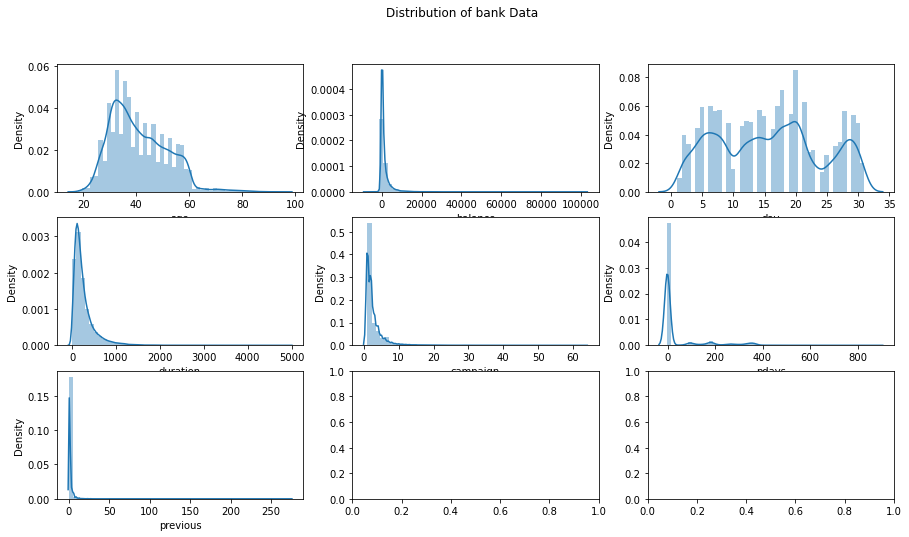

In [5]:
fig,axis=plt.subplots(3,3,figsize=(15,8))
fig.suptitle("Distribution of bank Data")
sns.distplot(bank_data["age"],ax=axis[0,0])
sns.distplot(bank_data["balance"],ax=axis[0,1])
sns.distplot(bank_data["day"],ax=axis[0,2])
sns.distplot(bank_data["duration"],ax=axis[1,0])
sns.distplot(bank_data["campaign"],ax=axis[1,1])
sns.distplot(bank_data["pdays"],ax=axis[1,2])
sns.distplot(bank_data["previous"],ax=axis[2,0])

In [6]:
bank_data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
bank_data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
bank_data["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [9]:
bank_data["default"].unique()

array(['no', 'yes'], dtype=object)

In [10]:
bank_data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [11]:
bank_data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [12]:
bank_data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [13]:
bank_data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [14]:
bank_data["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

#### *Spliting the data*

In [15]:
x=bank_data.drop(columns=["y"])
y=bank_data["y"]

## Data Cleaning

#### *Treating catagorical indepentent features with `one hot encoding`*

In [16]:
x_changed=pd.get_dummies(data=x,columns=["job","marital","education","default","housing","loan","contact","month","poutcome"])

In [17]:
y.replace({"yes":1,"no":0},inplace=True)

In [18]:
x_changed.shape,y.value_counts()

((45211, 51),
 0    39922
 1     5289
 Name: y, dtype: int64)

#### *Standerdizing data*

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
scaler.fit(x_changed)
x_scaled=scaler.transform(x_changed)

## Model Training

In [21]:
logistic=LogisticRegression()
logistic.fit(x_scaled,y)

LogisticRegression()

In [22]:
print("Intercept: ",logistic.intercept_)
print("Coef : ", logistic.coef_)

Intercept:  [-2.84317058]
Coef :  [[ 0.00121083  0.03908357  0.08278498  1.07962231 -0.28098563 -0.01021036
   0.02338915  0.0540493  -0.05753498 -0.03337224 -0.05454015  0.00190778
   0.09208783 -0.0235561  -0.01557349  0.07869502 -0.00228447 -0.0011261
  -0.01140348  0.01419451 -0.0660535   0.06172619 -0.07700704 -0.01567641
   0.07471546  0.00706092  0.00111775 -0.00111775  0.16775932 -0.16775932
   0.07800809 -0.07800809  0.33148312  0.13009024 -0.42013068  0.08809429
  -0.11599864  0.07197613  0.04934763 -0.15663937 -0.1699591   0.26149571
   0.19894395 -0.01921435 -0.14585941  0.15700031  0.1384644  -0.06689506
  -0.00230906  0.37304495 -0.11855698]]


In [23]:
y_pred=logistic.predict(x_scaled)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
probabilities=logistic.predict_proba(x_scaled)

In [25]:
probabilities[:,0]

array([0.9852509 , 0.99029865, 0.99704142, ..., 0.02478283, 0.88268454,
       0.87232308])

In [26]:
probabilities[:,1]

array([0.0147491 , 0.00970135, 0.00295858, ..., 0.97521717, 0.11731546,
       0.12767692])

## Evaluaing Model

#### *Confusion Metrix*

In [27]:
confusion_matrix = confusion_matrix(y, y_pred)

print (confusion_matrix)

[[38941   981]
 [ 3457  1832]]


<AxesSubplot:>

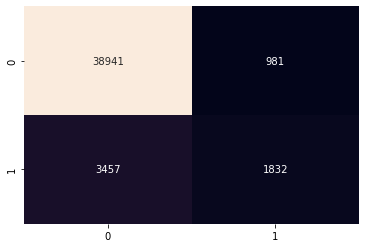

In [28]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cbar = False)

In [29]:
accuracy_score(y,y_pred)

0.901838048262591

In [30]:
(38941+1832)/(38941+981+3457+1832) ## Accuracy= Total Correct Preictions

0.901838048262591

In [31]:
precision_score(y,y_pred) ## Precision= True positive rate out of postive predictions

0.6512619978670459

In [32]:
recall_score(y,y_pred) ## Recall= True positive rate out of actual positives

0.3463792777462658

In [33]:
f1_score(y,y_pred)

0.4522340162922735

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.35      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



#### *ROC Curve*

In [35]:
fpr, tpr, thresholds = roc_curve(y, logistic.predict_proba(x_scaled)[:,1])

In [36]:
auc = roc_auc_score(y, y_pred)
auc

0.6609031802788741

Text(0.5, 1.0, 'logit model (area = 0.66)')

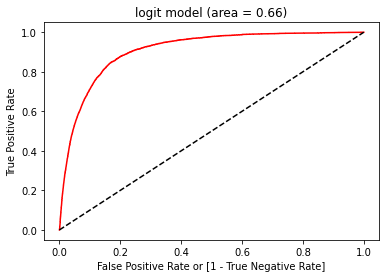

In [37]:
plt.plot(fpr, tpr, color='red') #label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

### <span style="color:Red">We did `one-hot-incoding` on all catagorical columns and we got accuracy of `90%` </span>

##### *Let's try to `impute bi-varient features to 0 and 1` and `other catagorical variables with one-hot-incoding`*

In [38]:
x_2=bank_data.drop(columns=["y"])
y_2=bank_data["y"]

In [39]:
x_2['default'].replace({"yes": 1,"no": 0},inplace=True)
x_2['housing'].replace({"yes": 1,"no": 0},inplace=True)
x_2['loan'].replace({"yes": 1,"no": 0},inplace=True)

In [40]:
x_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown


In [41]:
x_21=pd.get_dummies(data=x_2,columns=["job","marital","education","contact","month","poutcome"])

In [42]:
scaler=StandardScaler()
scaler.fit(x_21)
x_sca=scaler.transform(x_21)

In [43]:
logistic_2=LogisticRegression()

In [44]:
logistic_2.fit(x_sca,y_2)

LogisticRegression()

In [45]:
y_pre=logistic_2.predict(x_sca)

In [46]:
accuracy_score(y_2,y_pre)

0.9018601667735728

## Both models are giving same Accuracies